<a href="https://colab.research.google.com/github/tecexbarto/Mental-health-and-music/blob/main/MENTAL_HEALTH_MUSIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***MUSIC & MENTAL HEALTH SURVEY RESULTS: Resultados de una encuesta autoinformada sobre gustos musicales y salud mental***

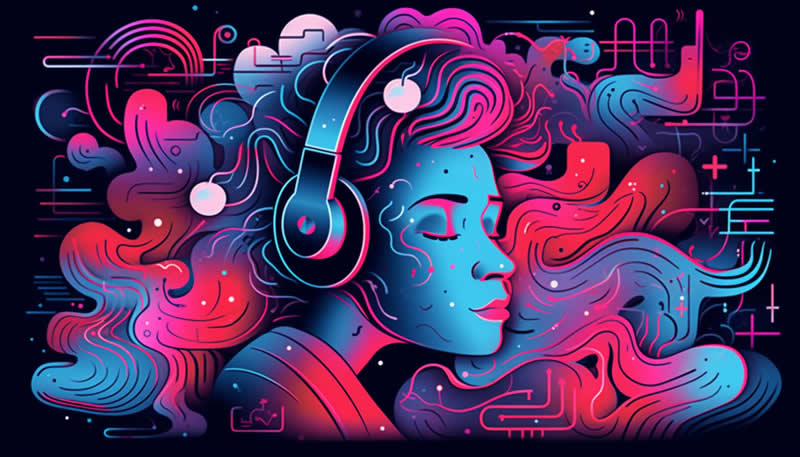

#IMPORTACIÓN DE LIBRERÍAS Y DATOS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN
import plotly.express as px

En esta ocasión también vamos a hacer uso de un dataset de Kaggle: Music & Mental Health Survey Results. Este dataset contiene los resultados de una encuesta sobre hábitos y preferencias musicales y salud mental.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mxmh_survey_results.csv to mxmh_survey_results.csv


In [ ]:
df = pd.read_csv('mxmh_survey_results.csv')

#ANÁLISIS EXPLORATORIO DE DATOS
Vamos a iniciar el análisis de datos con un analisis exploratorio, que nos servirá para comprender su naturaleza, características y posibles patrones.

##REVISIÓN INICIAL DEL DATASET

In [ ]:
#empezamos el análisis echando un vistazo al dataframe
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


En primer lugar vamos a explicar qué significa cada campo del dataframe

| Variable  | Definicion |
|-----------|-----------|
| Timestamp | Fecha y hora en la que se rellenó el cuestionario
| Age | Edad del encuestado
| Primary streaming service | Plataforma de streaming que el encuestado prefiere para escuchar música
| Hours per day | Cantidad de horas que el encuestado escucha música al día
| While working | Booleano que indica si el encuestado escucha música mientras trabaja, o no
| Instrumentalist	 | Booleano que indica si el encuestado toca algún instrumento con regularidad
| Composer | Booleano que indica si el encuestado compone música
| Fav genre | Género musical favorito del encuestado
| Exploratory | Booleano que indica si el encuestado explora activamente nuevos artistas o géneros
| Foreign languages | Booleano que indica si el encuestado escucha habitualmente música en un idioma que no domina
| BPM | Beats por minuto del género favorito
| Frequency [Classical] | Frecuencia con la que el encuestado escucha música clásica
| Frequency [Country] | Frecuencia con la que el encuestado escucha música country
| Frequency [EDM] | Frecuencia con la que el encuestado escucha EDM (Electronic Dance Music, que sería traducido como música dance o música electrónica)
| Frequency [Folk] | Frecuencia con la que el encuestado escucha música folk
| Frequency [Gospel] | Frecuencia con la que el encuestado escucha música gospel
| Frequency [Hip hop] | Frecuencia con la que el encuestado escucha música hip hop
| Frequency [Jazz] | Frecuencia con la que el encuestado escucha música jazz
| Frequency [K pop] | Frecuencia con la que el encuestado escucha música k-pop (pop coreano)
| Frequency [Latin] | Frecuencia con la que el encuestado escucha música latina
| Frequency [Lofi] | Frecuencia con la que el encuestado escucha música lofi, música para concentrarse o relajarse
| Frequency [Metal] | Frecuencia con la que el encuestado escucha música metal
| Frequency [Pop] | Frecuencia con la que el encuestado escucha música pop
| Frequency [R&B] | Frecuencia con la que el encuestado escucha R&B (Rhythm and blues)
| Frequency [Rap] | Frecuencia con la que el encuestado escucha música rap
| Frequency [Rock] | Frecuencia con la que el encuestado escucha música rock
| Frequency [Video game music] | Frecuencia con la que el encuestado escucha música de videojuegos
| Anxiety | Ansiedad autoinformada, en una escala del 0 al 10
| Depression | Depresión autoinformada, en una escala del 0 al 10
| Insomnia | Insomnio autoinformado, en una escala del 0 al 10
| OCD | OCD (en español, TOC, Trastorno obsesivo compulsivo) autoinformado, en una escala del 0 al 10
| Music effects | Efecto de la música sobre el estado de ánimo del encuestado
| Permissions | Permisos para publicar los datos

In [ ]:
#vamos a ver las primeras filas del dataset
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [ ]:
#también una muestra aleatoria de ellas
df.sample(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
198,8/28/2022 20:57:16,33.0,Spotify,7.0,Yes,No,No,Rock,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Sometimes,9.0,3.0,7.0,8.0,Improve,I understand.
246,8/28/2022 23:23:50,17.0,Spotify,4.0,No,Yes,No,Classical,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,7.0,9.0,2.0,8.0,Worsen,I understand.
238,8/28/2022 22:51:30,23.0,Spotify,5.0,Yes,Yes,Yes,Metal,Yes,Yes,...,Never,Never,Very frequently,Never,6.0,9.0,2.0,1.0,Improve,I understand.
382,8/29/2022 17:36:01,23.0,I do not use a streaming service.,2.0,Yes,No,No,Pop,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Sometimes,6.0,1.0,0.0,5.0,Improve,I understand.
87,8/28/2022 14:30:34,33.0,I do not use a streaming service.,1.0,No,No,No,Metal,No,Yes,...,Rarely,Sometimes,Sometimes,Sometimes,5.0,2.0,5.0,1.0,Improve,I understand.


In [ ]:
#finalmente vemos los últimos registros
df.tail()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.
735,11/9/2022 1:55:20,29.0,YouTube Music,2.0,Yes,No,No,Hip hop,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Rarely,2.0,2.0,2.0,5.0,Improve,I understand.


In [ ]:
n_filas = df.shape[0]
n_columnas = df.shape[1]
print('El dataframe tiene', n_filas, 'filas y', n_columnas, 'columnas')

El dataframe tiene 736 filas y 33 columnas


##TRATAMIENTO DE NULOS Y OUTLIERS

Antes de examinar qué contienen las diferentes columnas, deseamos saber si tenemos nulos y cómo están distribuidos.

In [ ]:
#en efecto, tenemos valores nulos en 8 columnas
df.isnull().sum()

,0
Timestamp,0
Age,1
Primary streaming service,1
Hours per day,0
While working,3
Instrumentalist,4
Composer,1
Fav genre,0
Exploratory,0
Foreign languages,4


Afortunadamente, en la mayoría de los casos el número de nulos es bastante bajo, con la excepción de la columna 'BPM', que cuenta con 107 nulos. Vamos a ocuparnos primero de los casos más sencillos.

In [ ]:
#rellenamos los nulos del campo Age con la mediana
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-12-41d5e7b85d9d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
#con el servicio de streaming favorito, rellenamos los nulos con la moda
df['Primary streaming service'].fillna(df['Primary streaming service'].mode()[0], inplace=True)

<ipython-input-13-3912bae5b1d6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Primary streaming service'].fillna(df['Primary streaming service'].mode()[0], inplace=True)


In [ ]:
#en las siguientes cinco columnas vamos a cambiar los nulos por un mensaje de No especificado
df['While working'].fillna('Not specified', inplace=True)
df['Instrumentalist'].fillna('Not specified', inplace=True)
df['Composer'].fillna('Not specified', inplace=True)
df['Foreign languages'].fillna('Not specified', inplace=True)
df['Music effects'].fillna('Not specified', inplace=True)

<ipython-input-14-6df1e6e61bcf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['While working'].fillna('Not specified', inplace=True)
<ipython-input-14-6df1e6e61bcf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

La columna 'BPM', como ya hemos señalado, cuenta con un número notable de nulos.

In [ ]:
null_p_bpm = ((df['BPM'].isnull().sum() / len(df))*100).round(2)
print('El porcentaje de nulos en la columna "BPM" es del', null_p_bpm, '%')

El porcentaje de nulos en la columna "BPM" es del 14.54 %


Hemos barajado varias opciones, pero hemos podido apreciar unos valores muy extremos que nos ha hecho plantearnos que quizás, antes de decidir qué hacemos con los nulos, convendría tratar también los outliers.

In [ ]:
#a continuación vemos los valores extremos
max_bpm = df['BPM'].max()
min_bpm = df['BPM'].min()
print('El valor máximo es', max_bpm, 'y el mínimo', min_bpm)

El valor máximo es 999999999.0 y el mínimo 0.0


In [ ]:
#observamos los valores con el método value_counts. No utilizamos el método unique porque, creemos que por el amplio rango que adoptan los valores, estos aparecen en formato decimal
df['BPM'].value_counts()

,count
BPM,
120.0,45
140.0,25
150.0,18
110.0,16
105.0,15
...,...
181.0,1
106.0,1
191.0,1


In [ ]:
#convertimos en nulos los valores de menos de 20 BPM o más de 300, ya que musicalmente no tienen sentido y debe tratarse de un error
df.loc[(df['BPM'] < 20) | (df['BPM'] > 300), 'BPM'] = np.nan

In [ ]:
#volvemos a ver los valores extremos, ahora con el método describe, y comprobamos que las correcciones se han aplicado
df['BPM'].describe()

,BPM
count,622.00000
mean,123.59164
std,32.27175
min,20.00000
25%,100.00000
50%,120.00000
75%,144.00000
max,220.00000


Ahora que ya hemos pasado a nulos esos valores extremos que probablemente eran erróneos, tomamos una decisión con respecto a aquellos. Vamos a rellenar los nulos con la media de BPM del género musical que sea el favorito del usuario encuestado.

In [ ]:
#primero extraemos la media de los BPM de cada género musical
mean_bpm_genre = df.groupby('Fav genre')['BPM'].mean().round(2)
mean_bpm_genre

,BPM
Fav genre,
Classical,114.58
Country,110.19
EDM,133.89
Folk,113.92
Gospel,116.33
Hip hop,111.91
Jazz,124.47
K pop,128.56
Latin,133.67


In [ ]:
#luego creamos una función que devuelve la media de BPM del estilo musical que corresponde si se encuentra un valor nulo
def impute_bpm(row):
    if pd.isnull(row['BPM']):
        return mean_bpm_genre[row['Fav genre']]
    else:
        return row['BPM']

In [ ]:
#finalmente aplicamos la función en la columna BPM
df['BPM'] = df.apply(impute_bpm, axis=1)

In [ ]:
#ahora ya no tenemos nulos en nuestro df
df.isnull().sum()

,0
Timestamp,0
Age,0
Primary streaming service,0
Hours per day,0
While working,0
Instrumentalist,0
Composer,0
Fav genre,0
Exploratory,0
Foreign languages,0


##EXPLORACIÓN DE LOS VALORES POR COLUMNAS
Ya hemos visto que el dataframe consta de 33 columnas. A continuación, examinaremos los valores contenidos en cada columna y la frecuencia con la que aparecen.

In [ ]:
#Antes de atender cada columna individualmente, con el método info vemos los tipos de datos que alberga cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           736 non-null    float64
 2   Primary streaming service     736 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 736 non-null    object 
 5   Instrumentalist               736 non-null    object 
 6   Composer                      736 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             736 non-null    object 
 10  BPM                           736 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

Empezaremos por Timestamp

In [ ]:
#lo primero que vamos a hacer es convertir esta columna a formato datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
#queremos saber si las encuestas se han realizado el mismo año, o no. Para ello creamos una nueva columna con el año
df['Year'] = df['Timestamp'].dt.year

In [ ]:
#ahora ya podemos corroborar que todas las encuestas se realizaron en el 2022
df['Year'].value_counts()

,count
Year,
2022,736


In [ ]:
#creamos también una nueva columna para la hora
df['Hour'] = df['Timestamp'].dt.hour

In [ ]:
#a simple vista podemos ver que la mayoría de las encuestas se realizaron por la tarde, a partir de las 12 del mediodía
df['Hour'].value_counts()

,count
Hour,
18,52
14,50
16,47
19,45
21,44
23,41
22,39
13,35
20,34


Es el turno del campo 'Age'.

In [ ]:
#primero cambiamos el tipo de dato a int
df['Age'] = df['Age'].astype(int)

In [ ]:
#tenemos 61 edades distintas en nuestros registros
df['Age'].nunique()

61

In [ ]:
#vemos las diferentes edades y su frecuencia
count_age = df['Age'].value_counts().reset_index()
count_age

,Age,count
0,18,85
1,19,61
2,17,59
3,21,53
4,16,44
...,...,...
56,39,1
57,73,1
58,72,1
59,69,1


In [ ]:
#ahora lo ordenamos según las edades, de menor a mayor edad
sorted_count_age = count_age.sort_values('Age').reset_index(drop=True)
sorted_count_age

,Age,count
0,10,1
1,12,3
2,13,8
3,14,17
4,15,21
...,...,...
56,72,1
57,73,1
58,74,1
59,80,1


In [ ]:
df['Age'].describe()

,Age
count,736.000000
mean,25.201087
std,12.047764
min,10.000000
25%,18.000000
50%,21.000000
75%,28.000000
max,89.000000


Tras estos análisis, podemos extraer varias conclusiones:

-La mayoría de los encuestados son personas jóvenes. La media se sitúa en 25 años, el percentil 50, en 21 años, y lo que es más sorprendente, el percentil 75, en 28. Esto es, sólo el 25% de los encuestados tiene más de 28 años.

-No obstante, el rango de edad de los encuestados es bastante amplio, teniendo el sujeto más joven 10 años, y el mayor, 89 años.

-De lo anterior da fe una desviación estándar de 12.05, que en este caso indica una dispersión considerable en las edades de los encuestados.

Vamos con la columna que contiene la plataforma de streaming favorita del usuario.

In [ ]:
df['Primary streaming service'].value_counts()

,count
Primary streaming service,
Spotify,459
YouTube Music,94
I do not use a streaming service.,71
Apple Music,51
Other streaming service,50
Pandora,11


In [ ]:
#lo vemos ahora en porcentaje
df['Primary streaming service'].value_counts(normalize=True).round(2)

,proportion
Primary streaming service,
Spotify,0.62
YouTube Music,0.13
I do not use a streaming service.,0.10
Apple Music,0.07
Other streaming service,0.07
Pandora,0.01


Vemos cómo más del 60 por ciento de los encuestados tienen a Spotify como plataforma de streaming favorita, lo que da fe de la posición consolidada en el panorama musical actual de la empresa sueca. El resto de servicios van muy rezagados hoy por hoy.

También encontramos un 10 por cien de usuarios que no escuchan música en streaming. Es de esperar que la escucharán por otras vías, como la radio o la tv.

Vamos con la columna que refleja el número de horas dedicadas a escuchar música.

In [ ]:
count_hours = df['Hours per day'].value_counts().reset_index()
count_hours

,Hours per day,count
0,2.00,173
1,3.00,120
2,1.00,117
3,4.00,83
4,5.00,54
5,6.00,47
6,8.00,29
7,10.00,20
8,0.50,20
9,1.50,17


In [ ]:
sorted_count_hours = count_hours.sort_values('Hours per day').reset_index(drop=True)
sorted_count_hours

,Hours per day,count
0,0.00,6
1,0.10,1
2,0.25,3
3,0.50,20
4,0.70,1
5,1.00,117
6,1.50,17
7,2.00,173
8,2.50,6
9,3.00,120


In [ ]:
df['Hours per day'].describe()

,Hours per day
count,736.000000
mean,3.572758
std,3.028199
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,24.000000


Destacamos varias aspectos relacionados con esta columna:

-Lo más común entre nuestros encuestados es escuchar música 2 horas al día. Escuchar música 3 horas al día ocupa el segundo lugar. No obstante, la media está en casi 4 horas diarias, con lo que se puede decir que los encuestados por lo general dedican buena parte del día a la música.

-Sorprende que haya gente que participa en la encuesta que dedica 0 horas al día a escuchar música. Tal vez se trata de un error, pero también puede tratarse simplemente de personas que escuchan música de forma ocasional, no a diario. Por si acaso se trata de esta alternativa, y como no tengo modo de averiguarlo y ante la duda, opto por ser conservador, decido no alterar los datos.

-También es un tanto extraño encontrar números decimales inferiores a 1 hora, tales como 0.10, o 0.50. Entendemos que son personas que solo le dedican a la música una determinada fracción de una hora.

-Llaman la atención algunos casos de sujetos con valores extremadamente altos. Por ejemplo, hay un individuo que escucha música 20 horas al día y otros tres que la escuchan durante 24 horas, lo que significa que pasan literalmente todo el día escuchando música. Esto vuelve a suscitar el interrogante de si se trata de datos erróneos que hubiera que eliminar o tratar de alguna manera, o simplemente de personas con hábitos muy marcados (datos que aunque extremos, convendría mantener porque al fin y al cabo reflejan una conducta que podría resultar significativa y estar relacionada con otras tendencias). Al final decido mantener estos valores, ya que entran dentro de lo técnicamente posible.

Es el turno de la columna que responde al interrogante de si el encuestado escucha música mientra trabaja.

In [ ]:
df['While working'].value_counts()

,count
While working,
Yes,579
No,154
Not specified,3


In [ ]:
#ahora lo vemos en porcentaje
df['While working'].value_counts(normalize=True)

,proportion
While working,
Yes,0.786685
No,0.209239
Not specified,0.004076


Casi el 80% de los encuestados reconocen escuchar música en el trabajo, lo cual es una cifra bastante elevada. Hay un 0.004& de datos nulos en este campo.

Vamos con la columna 'Instrumentalist'.

In [ ]:
df['Instrumentalist'].value_counts(normalize=True)

,proportion
Instrumentalist,
No,0.675272
Yes,0.319293
Not specified,0.005435


Algo más de un 30% de los encuestados tocan algún instrumento regularmente. Es un porcentaje algo más elevado de lo que pensaba, pero supongo que la gente que ha participado en la encuesta no conforman una muestra representativa y tienen un interés por la música más alto de lo habitual.

Es el turno de la columna 'Composer'.

In [ ]:
df['Composer'].value_counts(normalize=True)

,proportion
Composer,
No,0.827446
Yes,0.171196
Not specified,0.001359


Solo un 17% de los encuestados compone música.

Vamos con la columna del género favorito.

In [ ]:
n_genre = df['Fav genre'].nunique()
print('En los registros hay', n_genre, 'géneros musicales')

En los registros hay 16 géneros musicales


In [ ]:
df['Fav genre'].value_counts()

,count
Fav genre,
Rock,188
Pop,114
Metal,88
Classical,53
Video game music,44
EDM,37
R&B,35
Hip hop,35
Folk,30


In [ ]:
#ahora lo vemos en porcentaje
df['Fav genre'].value_counts(normalize=True).round(3)

,proportion
Fav genre,
Rock,0.255
Pop,0.155
Metal,0.120
Classical,0.072
Video game music,0.060
EDM,0.050
R&B,0.048
Hip hop,0.048
Folk,0.041


El rock encabeza la lista de los géneros musicales favoritos, con aproximadamente un 25%. En el podio le siguen el pop y el metal.
Llama la atención la ausencia de algunos de los estilos que más se escuchan actualmente, como el trap o el reguetón, y también la escasa representatividad de la gente que tiene a la música latina como música favorita.

Por ello me da la impresión que esta encuesta está sesgada en cuanto a los gustos musicales y no refleja las preferencias de la sociedad actual, con lo que tendremos que mostrarnos cautos a la hora de establecer conclusiones, especialmente en ciertos estilos musicales que están pobremente representados.

Vamos con la columna 'Exploratory'.

In [ ]:
df['Exploratory'].value_counts(normalize=True).round(2)

,proportion
Exploratory,
Yes,0.71
No,0.29


Más del 70% de los encuestados están abiertos a explorar nuevos géneros o artistas musicales.

Es el turno de la columna 'Foreign languages'.

In [ ]:
df['Foreign languages'].value_counts(normalize=True).round(2)

,proportion
Foreign languages,
Yes,0.55
No,0.45
Not specified,0.01


Aproximadamente un 55% de los encuestados escuchan regularmente música de un idioma que no es el suyo.

Vamos con la columna de los BPM. Es una columna que ya habíamos explorado en el apartado anterior, pero vamos a repetir algunas de las líneas de código para mantener la consistencia.

In [ ]:
n_bpm = df['BPM'].nunique()
print('Hay', n_bpm, 'valores únicos en la columna BPM')

Hay 144 valores únicos en la columna BPM


In [ ]:
#recordemos que, después de las correcciones, el valor mínimo, máximo, y otros estadísticos, se habían quedado así
df['BPM'].describe()

,BPM
count,736.000000
mean,123.402024
std,29.849796
min,20.000000
25%,105.000000
50%,120.000000
75%,140.000000
max,220.000000


En la sección anterior fijé el mínimo en 20 BPM, y el máximo en 300 BPM, para eliminar lo que con toda probabilidad se trataba de erratas. Con lo cual, los valores que encontramos se hallan dentro de ese intervalo.

La media podemos observar que se sitúa en los 123 BPM, y la desviación estándar en 29.84, lo que sugiere una dispersión moderada de los datos.

Vamos ahora con las columnas de la frecuencia con la que se escuchan diferentes géneros musicales.

In [ ]:
#empezamos con la música clásica
f_classical = df['Frequency [Classical]'].value_counts(normalize=True).round(2).reset_index()
f_classical

,Frequency [Classical],proportion
0,Rarely,0.35
1,Sometimes,0.27
2,Never,0.23
3,Very frequently,0.15


In [ ]:
#seguimos con la música country
f_country = df['Frequency [Country]'].value_counts(normalize=True).round(2).reset_index()
f_country

,Frequency [Country],proportion
0,Never,0.47
1,Rarely,0.32
2,Sometimes,0.15
3,Very frequently,0.07


In [ ]:
#seguimos con la música electrónica y dance
f_edm = df['Frequency [EDM]'].value_counts(normalize=True).round(2).reset_index()
f_edm

,Frequency [EDM],proportion
0,Never,0.42
1,Rarely,0.26
2,Sometimes,0.20
3,Very frequently,0.12


In [ ]:
#es el turno de la música folk
f_folk = df['Frequency [Folk]'].value_counts(normalize=True).round(2).reset_index()
f_folk

,Frequency [Folk],proportion
0,Never,0.40
1,Rarely,0.30
2,Sometimes,0.20
3,Very frequently,0.11


In [ ]:
#ahora le toca a la música gospel
f_gospel = df['Frequency [Gospel]'].value_counts(normalize=True).round(2).reset_index()
f_gospel

,Frequency [Gospel],proportion
0,Never,0.73
1,Rarely,0.18
2,Sometimes,0.07
3,Very frequently,0.02


In [ ]:
#y ahora al Hip hop
f_hiphop = df['Frequency [Hip hop]'].value_counts(normalize=True).round(2).reset_index()
f_hiphop

,Frequency [Hip hop],proportion
0,Sometimes,0.30
1,Rarely,0.29
2,Never,0.25
3,Very frequently,0.17


In [ ]:
#es el turno del jazz
f_jazz = df['Frequency [Jazz]'].value_counts(normalize=True).round(2).reset_index()
f_jazz

,Frequency [Jazz],proportion
0,Never,0.35
1,Rarely,0.34
2,Sometimes,0.24
3,Very frequently,0.07


In [ ]:
#y ahora el turno del pop coreano
f_kpop = df['Frequency [K pop]'].value_counts(normalize=True).round(2).reset_index()
f_kpop

,Frequency [K pop],proportion
0,Never,0.57
1,Rarely,0.24
2,Very frequently,0.10
3,Sometimes,0.09


In [ ]:
#le toca a la música latina
f_latin = df['Frequency [Latin]'].value_counts(normalize=True).round(2).reset_index()
f_latin

,Frequency [Latin],proportion
0,Never,0.60
1,Rarely,0.23
2,Sometimes,0.12
3,Very frequently,0.04


In [ ]:
#veremos ahora cuán frecuentemente se escucha la música Lofi
f_lofi = df['Frequency [Lofi]'].value_counts(normalize=True).round(2).reset_index()
f_lofi

,Frequency [Lofi],proportion
0,Never,0.38
1,Rarely,0.29
2,Sometimes,0.22
3,Very frequently,0.12


In [ ]:
#y la música Metal
f_metal = df['Frequency [Metal]'].value_counts(normalize=True).round(2).reset_index()
f_metal

,Frequency [Metal],proportion
0,Never,0.36
1,Rarely,0.26
2,Very frequently,0.20
3,Sometimes,0.18


In [ ]:
#ahora le toca a la música Pop
f_pop = df['Frequency [Pop]'].value_counts(normalize=True).round(2).reset_index()
f_pop

,Frequency [Pop],proportion
0,Very frequently,0.38
1,Sometimes,0.35
2,Rarely,0.19
3,Never,0.08


In [ ]:
#y ahora a la musica R&B
f_rb = df['Frequency [R&B]'].value_counts(normalize=True).round(2).reset_index()
f_rb

,Frequency [R&B],proportion
0,Never,0.31
1,Rarely,0.29
2,Sometimes,0.25
3,Very frequently,0.16


In [ ]:
#vemos cuánto se escucha el rap
f_rap = df['Frequency [Rap]'].value_counts(normalize=True).round(2).reset_index()
f_rap

,Frequency [Rap],proportion
0,Rarely,0.29
1,Never,0.27
2,Sometimes,0.26
3,Very frequently,0.17


In [ ]:
#y cuánto se escucha el rock
f_rock = df['Frequency [Rock]'].value_counts(normalize=True).round(2).reset_index()
f_rock

,Frequency [Rock],proportion
0,Very frequently,0.45
1,Sometimes,0.30
2,Rarely,0.13
3,Never,0.12


In [ ]:
#por último vemos con qué frecuencia se escucha música de videojuegos
f_videogame = df['Frequency [Video game music]'].value_counts(normalize=True).round(2).reset_index()
f_videogame

,Frequency [Video game music],proportion
0,Never,0.32
1,Rarely,0.27
2,Sometimes,0.25
3,Very frequently,0.16


Vamos a hacer un dataframe en el que aparezcan todos los tipos de música, y las diferentes frecuencias en cada uno de estos, para poder compararlos entre sí de mejor manera.

In [ ]:
#primero cambiamos los nombres de las columnas de los df de los géneros musicales
f_classical.columns = ['Frequency', 'Classical']
f_country.columns = ['Frequency', 'Country']
f_edm.columns = ['Frequency', 'EDM']
f_folk.columns = ['Frequency', 'Folk']
f_gospel.columns = ['Frequency', 'Gospel']
f_hiphop.columns = ['Frequency', 'Hip hop']
f_jazz.columns = ['Frequency', 'Jazz']
f_kpop.columns = ['Frequency', 'K pop']
f_latin.columns = ['Frequency', 'Latin']
f_lofi.columns = ['Frequency', 'Lofi']
f_metal.columns = ['Frequency', 'Metal']
f_pop.columns = ['Frequency', 'Pop']
f_rb.columns = ['Frequency', 'R&B']
f_rap.columns = ['Frequency', 'Rap']
f_rock.columns = ['Frequency', 'Rock']
f_videogame.columns = ['Frequency', 'Videogame']

In [ ]:
#luego hacemos un merge para unir todos los df en uno
f_genre = pd.merge(f_rock, f_videogame, on='Frequency', how='outer') \
                .merge(f_rap, on='Frequency', how='outer') \
                .merge(f_rb, on='Frequency', how='outer') \
                .merge(f_pop, on='Frequency', how='outer') \
                .merge(f_metal, on='Frequency', how='outer') \
                .merge(f_lofi, on='Frequency', how='outer') \
                .merge(f_latin, on='Frequency', how='outer') \
                .merge(f_kpop, on='Frequency', how='outer') \
                .merge(f_jazz, on='Frequency', how='outer') \
                .merge(f_hiphop, on='Frequency', how='outer') \
                .merge(f_gospel, on='Frequency', how='outer') \
                .merge(f_folk, on='Frequency', how='outer') \
                .merge(f_edm, on='Frequency', how='outer') \
                .merge(f_country, on='Frequency', how='outer') \
                .merge(f_classical, on='Frequency', how='outer')
f_genre

,Frequency,Rock,Videogame,Rap,R&B,Pop,Metal,Lofi,Latin,K pop,Jazz,Hip hop,Gospel,Folk,EDM,Country,Classical
0,Never,0.12,0.32,0.27,0.31,0.08,0.36,0.38,0.60,0.57,0.35,0.25,0.73,0.40,0.42,0.47,0.23
1,Rarely,0.13,0.27,0.29,0.29,0.19,0.26,0.29,0.23,0.24,0.34,0.29,0.18,0.30,0.26,0.32,0.35
2,Sometimes,0.30,0.25,0.26,0.25,0.35,0.18,0.22,0.12,0.09,0.24,0.30,0.07,0.20,0.20,0.15,0.27
3,Very frequently,0.45,0.16,0.17,0.16,0.38,0.20,0.12,0.04,0.10,0.07,0.17,0.02,0.11,0.12,0.07,0.15


Así se pueden ver de manera más clara las frecuencias de cada género musical:

-El rock, que es mayoritariamente el género musical favorito entre los encuestados, también es el estilo que más se escucha con mucha frecuencia. Un 45% de los encuestados dicen escuchar rock muy frecuentemente.

-El pop y el metal, que son respectivamente el segundo y el tercer género favorito, también aparecen en segundo y en tercer lugar en cuanto a géneros musicales escuchados muy frecuentemente.

-En cuanto a géneros que se escuchan de vez en cuando, el pop encabeza esta lista, seguido por el rock y el hip hop, que están empatados.

-La música clásica es la primera en los géneros que se escuchan raramente, seguida del jazz y el country.

-Entre los géneros más denostados, aquellos que nuestros encuestados afirman que nunca escuchan, sobresale el Gospel, seguido de cerca por la música latina y el K pop.

Vamos ahora con otro bloque, el de las patologías autoinformadas.

In [ ]:
#empezamos con la ansiedad
anxiety = df['Anxiety'].value_counts(normalize=True).round(2).reset_index()
anxiety

,Anxiety,proportion
0,7.0,0.17
1,8.0,0.16
2,6.0,0.11
3,3.0,0.09
4,10.0,0.09
5,5.0,0.08
6,9.0,0.08
7,4.0,0.08
8,2.0,0.06
9,0.0,0.05


In [ ]:
depression = df['Depression'].value_counts(normalize=True).round(2).reset_index()
depression

,Depression,proportion
0,7.0,0.13
1,2.0,0.13
2,6.0,0.12
3,0.0,0.11
4,8.0,0.10
5,3.0,0.08
6,4.0,0.08
7,5.0,0.08
8,10.0,0.06
9,1.0,0.05


In [ ]:
insomnia = df['Insomnia'].value_counts(normalize=True).round(2).reset_index()
insomnia

,Insomnia,proportion
0,0.0,0.20
1,2.0,0.12
2,1.0,0.11
3,3.0,0.09
4,6.0,0.08
5,7.0,0.08
6,4.0,0.08
7,5.0,0.08
8,8.0,0.07
9,10.0,0.05


In [ ]:
ocd = df['OCD'].value_counts(normalize=True).round(2).reset_index()
ocd

,OCD,proportion
0,0.0,0.34
1,2.0,0.13
2,1.0,0.13
3,3.0,0.09
4,5.0,0.07
5,4.0,0.07
6,7.0,0.05
7,6.0,0.04
8,8.0,0.04
9,10.0,0.03


Vamos a hacer igual que en el apartado anterior: uniremos los dataframes de las diferentes patologías para aglutinarlo en uno solo.

In [ ]:
#primero creamos nuevos df ordenados según la puntuación
sorted_anxiety = anxiety.sort_values('Anxiety').reset_index(drop=True)
sorted_depression = depression.sort_values('Depression').reset_index(drop=True)
sorted_insomnia = insomnia.sort_values('Insomnia').reset_index(drop=True)
sorted_ocd = ocd.sort_values('OCD').reset_index(drop=True)

In [ ]:
#luego cambiamos los nombres de las columnas que deseamos
sorted_anxiety.columns = ['Score', 'Anxiety']
sorted_depression.columns = ['Score', 'Depression']
sorted_insomnia.columns = ['Score', 'Insomnia']
sorted_ocd.columns = ['Score', 'OCD']

In [ ]:
pathologies = pd.merge(sorted_anxiety, sorted_depression, on='Score', how='outer') \
                .merge(sorted_insomnia, on='Score', how='outer') \
                .merge(sorted_ocd, on='Score', how='outer')
pathologies

,Score,Anxiety,Depression,Insomnia,OCD
0,0.0,0.05,0.11,0.20,0.34
1,1.0,0.04,0.05,0.11,0.13
2,2.0,0.06,0.13,0.12,0.13
3,3.0,0.09,0.08,0.09,0.09
4,3.5,NaN,0.00,0.00,NaN
5,4.0,0.08,0.08,0.08,0.07
6,5.0,0.08,0.08,0.08,0.07
7,5.5,NaN,NaN,NaN,0.00
8,6.0,0.11,0.12,0.08,0.04
9,7.0,0.17,0.13,0.08,0.05


In [ ]:
#como vemos que tras los joins, se han desordenado algunos valores de la columma Score, volvemos a ordenarla para así obtener ya el df como queremos
pathologies = pathologies.sort_values('Score').reset_index(drop=True)
pathologies

,Score,Anxiety,Depression,Insomnia,OCD
0,0.0,0.05,0.11,0.20,0.34
1,1.0,0.04,0.05,0.11,0.13
2,2.0,0.06,0.13,0.12,0.13
3,3.0,0.09,0.08,0.09,0.09
4,3.5,NaN,0.00,0.00,NaN
5,4.0,0.08,0.08,0.08,0.07
6,5.0,0.08,0.08,0.08,0.07
7,5.5,NaN,NaN,NaN,0.00
8,6.0,0.11,0.12,0.08,0.04
9,7.0,0.17,0.13,0.08,0.05


In [ ]:
#también vamos a ver las medias y las medianas de las distintas psicopatologías
mean_anxiety = df['Anxiety'].mean().round(2)
median_anxiety = round(df['Anxiety'].median(), 2)
print('En la ansiedad la media de las puntuaciones es', mean_anxiety, 'y la mediana,', median_anxiety)
mean_depression = df['Depression'].mean().round(2)
median_depression = round(df['Depression'].median(), 2)
print('En la depresión la media de las puntuaciones es', mean_depression, 'y la mediana,', median_depression)
mean_insomnia = df['Insomnia'].mean().round(2)
median_insomnia = round(df['Insomnia'].median(), 2)
print('En el insomnio la media de las puntuaciones es', mean_insomnia, 'y la mediana,', median_insomnia)
mean_ocd = df['OCD'].mean().round(2)
median_ocd = round(df['OCD'].median(), 2)
print('En el TOC la media de las puntuaciones es', mean_ocd, 'y la mediana,', median_ocd)

En la ansiedad la media de las puntuaciones es 5.84 y la mediana, 6.0
En la depresión la media de las puntuaciones es 4.8 y la mediana, 5.0
En el insomnio la media de las puntuaciones es 3.74 y la mediana, 3.0
En el TOC la media de las puntuaciones es 2.64 y la mediana, 2.0


A continuación, comentamos los resultados que más nos han llamado la atención:

-La puntuación más común que los encuestados le otorgan a la ansiedad es un 7 (con un 17%), seguida de un 8 (16%). Aproximadamente un 61% de los encuestados puntúan más de un 5 en ansiedad. Sólo un 5% refieren un 0 de ansiedad, y un 4% puntúan 1 en ansiedad. En cuanto a la media y la mediana, la primera se sitúa en un 5,84, y la segunda, en 6. Son valores algo más bajos que la puntuación más común, pero se mantienen relativamente cerca.

-En cuanto a la depresión, los resultados son aparentemente algo más discretos. Un 13% de los encuestados le da una puntuación de 7, pero también el mismo porcentaje le da una puntuación de 2. Solo un 46% refiere tener una depresión superior a 5. Además, un apreciable 11% notifica un 0 en depresión. La media de la depresión es un 4,8 y la mediana un 5, lo que viene a confirmar lo anterior.

-Los resultados del insomnio son todavía más tibios. Un 20% (la puntuación más común) de los encuestados dicen no tener nada de insomnio, y solo un 32% da una nota mayor a 5 de insomnio. Su media es de un 3,74 y la mediana de un 3.

-Con el OCD (o sus siglas en español, TOC, Trastorno obsesivo-compulsivo) seguimos la misma tendencia a la baja. Un 34% aseguran no padecer esta patología, y solo un 18% le da una puntuación mayor a 5. Su media y la mediana son las más bajas de todas las psicopatologías.

-Una vez revisadas las distintas patologías, podemos afirmar que la ansiedad es la más extendida entre los encuestados, seguida de la depresión.

Vamos con la columna Music effects.

In [ ]:
df['Music effects'].value_counts(normalize=True).round(2)

,proportion
Music effects,
Improve,0.74
No effect,0.23
Worsen,0.02
Not specified,0.01


La columna Permissions es un consentimiento que dan los encuestados para que los resultados se publiquen. Suponemos que era una cláusula obligatoria para poder participar en la encuesta, y de hecho todos los participantes dieron su consentimiento.

In [ ]:
df['Permissions'].value_counts(normalize=True)

,proportion
Permissions,
I understand.,1.0


##INFLUENCIA DEL GÉNERO MUSICAL FAVORITO EN DIFERENTES FACTORES

Exploraremos cómo el género musical favorito de los encuestados se relaciona con otros factores relevantes para identificar posibles conexiones.

Empecemos con las relaciones que pueda haber entre el género favorito y la edad.

In [ ]:
#extraemos, por cada género musical, la media y la mediana de edad
fgenre_age = df.groupby(df['Fav genre']).agg({'Age' : ['mean', 'median']}).reset_index().round(1)
fgenre_age

Fav genre   Age       
                      mean median
0          Classical  26.2   20.0
1            Country  25.4   21.0
2                EDM  22.1   20.0
3               Folk  25.8   23.5
4             Gospel  55.7   60.0
5            Hip hop  23.4   21.0
6               Jazz  25.4   22.5
7              K pop  18.4   18.0
8              Latin  17.7   18.0
9               Lofi  22.1   22.0
10             Metal  25.1   23.0
11               Pop  23.3   20.0
12               R&B  25.3   19.0
13               Rap  21.8   18.0
14              Rock  28.4   23.0
15  Video game music  21.6   21.0

Teniendo en cuenta que ya sabemos que la media en general de la edad de los encuestados está en torno a los 25 años, podemos destacar varios apuntes:

-La gente que tiene como género favorito el gospel tiene una media de edad de 55 años, lo que le sitúa como el género musical con una edad más alta de media.

-En cambio, hay otros géneros, concretamente la música latina y el k pop, con una edad media inferior a los 20 años.

-Sin embargo, la mayoría de los estilos musicales tienen una edad media no muy distinta respecto a la media general.

-La mediana suele presentar valores similares a la media, salvo en algunos casos, como en el género R&B, que difieren en más de 6 puntos.

Ahora vamos con las relaciones entre el género musical y la plataforma de streaming preferida.

In [ ]:
#obtenemos la moda de la plataforma de streaming en cada género musical
fgenre_streaming = df.groupby('Fav genre')['Primary streaming service'].agg(lambda x: x.mode()[0]).reset_index()
fgenre_streaming

,Fav genre,Primary streaming service
0,Classical,Spotify
1,Country,Spotify
2,EDM,Spotify
3,Folk,Spotify
4,Gospel,Pandora
5,Hip hop,Spotify
6,Jazz,Spotify
7,K pop,Spotify
8,Latin,Spotify
9,Lofi,Spotify


Observamos que Spotify es la plataforma de streaming favorita en casi todos los géneros musicales, algo que no sorprende porque Spotify es la preferida de más del sesenta por ciento de los encuestados.

La única excepción la conforma el gospel. Aquellos que tienen al gospel como género musical favorito suelen preferir Pandora.

Sigamos con el género musical favorito y las horas diarias que se le dedica a la música.

In [ ]:
#extraemos, por cada género musical, cuántas horas de media se escucha música. Hacemos lo mismo con la mediana
fgenre_hours = df.groupby(df['Fav genre']).agg({'Hours per day' : ['mean', 'median']}).reset_index().round(1)
fgenre_hours

Fav genre Hours per day       
                              mean median
0          Classical           2.9    3.0
1            Country           3.4    3.0
2                EDM           4.6    3.0
3               Folk           3.2    2.8
4             Gospel           2.4    1.5
5            Hip hop           3.9    3.0
6               Jazz           5.4    5.0
7              K pop           4.0    3.0
8              Latin           6.7    5.0
9               Lofi           4.2    4.0
10             Metal           3.6    3.0
11               Pop           2.9    2.0
12               R&B           3.5    3.0
13               Rap           5.3    3.0
14              Rock           3.6    3.0
15  Video game music           2.9    2.0

Teniendo en cuenta que en general la media de horas escuchando música es de aproximadamente 3,5 horas, y la mediana 3 horas, podriamos comentar lo siguiente:

-Aparentemente los fans de la música latina son los que más horas le dedican a escuchar música. No obstante, estos datos hay que tomarlos con precaución, ya que solo representan un 0,004 por ciento del total; son concretamente 3 registros.

-Hay otros géneros musicales cuyos fans también escuchan bastantes horas de música al día, como el jazz y el rap.

-En cambio, géneros tan variopintos como el gospel, el pop y la música de videojuegos, destacan por abajo. Sin embargo con el gospel sucede algo parecido que con la música latina, que está tan poco representado (un 0,008), que los resultados que podamos obtener probablemente estén sesgados.

-La media y la mediana suelen tener valores similares, pero en ocasiones difieren sustancialmente. Por ejemplo, en el caso de la música EDM, latina, o el rap. Se trata de un sesgo a la derecha, lo que significa que hay algunos valores altos que están "tirando" de la media hacia arriba.

Vamos con el género musical favorito y si esto guarda relación con el hecho de escuchar música en el trabajo.

In [ ]:
#agrupamos, según el género musical, los diferentes valores que toma el campo While working. Con unstack convertimos cada valor de While working en una columna
fgenre_working = df.groupby(['Fav genre', 'While working']).size().unstack(fill_value=0).reset_index() #con fill_value=0 nos aseguramos que si no hay datos, estos espacios en blanco se rellenen con 0, y no con Nan
fgenre_working

While working,Fav genre,No,Not specified,Yes
0,Classical,11,0,42
1,Country,7,0,18
2,EDM,8,0,29
3,Folk,5,0,25
4,Gospel,1,0,5
5,Hip hop,8,0,27
6,Jazz,3,0,17
7,K pop,2,2,22
8,Latin,0,0,3
9,Lofi,0,0,10


In [ ]:
#eliminamos el nombre del indice
fgenre_working.columns.name = None
fgenre_working

,Fav genre,No,Not specified,Yes
0,Classical,11,0,42
1,Country,7,0,18
2,EDM,8,0,29
3,Folk,5,0,25
4,Gospel,1,0,5
5,Hip hop,8,0,27
6,Jazz,3,0,17
7,K pop,2,2,22
8,Latin,0,0,3
9,Lofi,0,0,10


Queremos ver los datos en porcentajes, para poder interpretarlos mejor.

In [ ]:
#creamos una nueva columna en la que aparezca el total de encuestados que tienen ese estilo musical como favorito
fgenre_working['Total'] = fgenre_working[['No', 'Not specified', 'Yes']].sum(axis=1)
#creamos otra columna que muestre el porcentaje de encuestados que no escuchan música en el trabajo en cada género musical
fgenre_working['No (%)'] = (fgenre_working['No'] / fgenre_working['Total'] * 100).round(1)
#creamos otra columna con el porcentaje de personas que no especificaron si escuchan música en el trabajo
fgenre_working['Not specified (%)'] = (fgenre_working['Not specified'] / fgenre_working['Total'] * 100).round(1)
#por último creamos la columna con el porcentaje de personas que escuchan música en el trabajo
fgenre_working['Yes (%)'] = (fgenre_working['Yes'] / fgenre_working['Total'] * 100).round(1)
#finalmente eliminamos la columna de totales ya que no la necesitamos más
fgenre_working = fgenre_working.drop(columns='Total')
fgenre_working

,Fav genre,No,Not specified,Yes,No (%),Not specified (%),Yes (%)
0,Classical,11,0,42,20.8,0.0,79.2
1,Country,7,0,18,28.0,0.0,72.0
2,EDM,8,0,29,21.6,0.0,78.4
3,Folk,5,0,25,16.7,0.0,83.3
4,Gospel,1,0,5,16.7,0.0,83.3
5,Hip hop,8,0,27,22.9,0.0,77.1
6,Jazz,3,0,17,15.0,0.0,85.0
7,K pop,2,2,22,7.7,7.7,84.6
8,Latin,0,0,3,0.0,0.0,100.0
9,Lofi,0,0,10,0.0,0.0,100.0


Aquellos que más escuchan música en el trabajo son los que tienen como género favorito la música latina (aunque ya sabemos que contamos con muy pocos datos de este género y por lo tanto hay que ser cuidadosos con las conclusiones que podamos establecer) y la música lofi.  En el caso de la música lofi, lo vemos esperable, ya que se trata de una música para crear ambiente, no muy invasiva, que nos parece compatible con el trabajo.

En el lado opuesto tenemos el rap. Sus seguidores son los que menos escuchan música en el trabajo, en relación con los demás estilos musicales. Aún así, siguen siendo mayoría los que sí la escuchan.  



Es el turno de explorar las relaciones entre el género favorito y si el encuestado toca algún instrumento.

In [ ]:
#agrupamos los distintos géneros musicales según si tocan algún instrumento o no
fgenre_instrumentalist = df.groupby(['Fav genre', 'Instrumentalist']).size().unstack(fill_value=0).reset_index()
fgenre_instrumentalist.columns.name = None  #eliminamos el nombre del indice
fgenre_instrumentalist

,Fav genre,No,Not specified,Yes
0,Classical,14,1,38
1,Country,18,0,7
2,EDM,29,0,8
3,Folk,22,0,8
4,Gospel,3,0,3
5,Hip hop,30,0,5
6,Jazz,9,0,11
7,K pop,16,2,8
8,Latin,0,0,3
9,Lofi,8,0,2


In [ ]:
#creamos una nueva columna en la que aparezca el total de encuestados que tienen ese estilo musical como favorito
fgenre_instrumentalist['Total'] = fgenre_instrumentalist[['No', 'Not specified', 'Yes']].sum(axis=1)
#creamos otra columna que muestre el porcentaje de encuestados de cada género musical que no tocan ningún instrumento
fgenre_instrumentalist['No (%)'] = (fgenre_instrumentalist['No'] / fgenre_instrumentalist['Total'] * 100).round(1)
#creamos otra columna con el porcentaje de personas que no especificaron si tocan algún instrumento
fgenre_instrumentalist['Not specified (%)'] = (fgenre_instrumentalist['Not specified'] / fgenre_instrumentalist['Total'] * 100).round(1)
#por último creamos la columna con el porcentaje de personas que sí tocan algún instrumento
fgenre_instrumentalist['Yes (%)'] = (fgenre_instrumentalist['Yes'] / fgenre_instrumentalist['Total'] * 100).round(1)
#finalmente eliminamos la columna de totales ya que no la necesitamos más
fgenre_instrumentalist = fgenre_instrumentalist.drop(columns='Total')
fgenre_instrumentalist

,Fav genre,No,Not specified,Yes,No (%),Not specified (%),Yes (%)
0,Classical,14,1,38,26.4,1.9,71.7
1,Country,18,0,7,72.0,0.0,28.0
2,EDM,29,0,8,78.4,0.0,21.6
3,Folk,22,0,8,73.3,0.0,26.7
4,Gospel,3,0,3,50.0,0.0,50.0
5,Hip hop,30,0,5,85.7,0.0,14.3
6,Jazz,9,0,11,45.0,0.0,55.0
7,K pop,16,2,8,61.5,7.7,30.8
8,Latin,0,0,3,0.0,0.0,100.0
9,Lofi,8,0,2,80.0,0.0,20.0


Los seguidores del género latino destacan en esta estadística como los que más tocan algún instrumento. Una vez más, me reitero en la precaución con la que tenemos que tratar estos datos, dada la escasez de representación. Les siguen los seguidores de la música clásica.

Por el contrario, los fans del hip hop, el R&B y la música lofi son aquellos que menos tocan algún instrumento.

Ahora veremos si el género favorito guarda relación con componer música.

In [ ]:
fgenre_composer = df.groupby(['Fav genre', 'Composer']).size().unstack(fill_value=0).reset_index()
fgenre_composer.columns.name = None
fgenre_composer

,Fav genre,No,Not specified,Yes
0,Classical,39,0,14
1,Country,21,0,4
2,EDM,30,0,7
3,Folk,26,0,4
4,Gospel,4,0,2
5,Hip hop,29,0,6
6,Jazz,11,0,9
7,K pop,24,1,1
8,Latin,2,0,1
9,Lofi,8,0,2


In [ ]:
#creamos una nueva columna en la que aparezca el total de encuestados que tienen ese estilo musical como favorito
fgenre_composer['Total'] = fgenre_composer[['No', 'Not specified', 'Yes']].sum(axis=1)
#creamos otra columna que muestre el porcentaje de encuestados de cada género musical que no compone
fgenre_composer['No (%)'] = (fgenre_composer['No'] / fgenre_composer['Total'] * 100).round(1)
#creamos otra columna con el porcentaje de personas que no especificaron si componen
fgenre_composer['Not specified (%)'] = (fgenre_composer['Not specified'] / fgenre_composer['Total'] * 100).round(1)
#por último creamos la columna con el porcentaje de personas que sí componen
fgenre_composer['Yes (%)'] = (fgenre_composer['Yes'] / fgenre_composer['Total'] * 100).round(1)
#finalmente eliminamos la columna de totales ya que no la necesitamos más
fgenre_composer = fgenre_composer.drop(columns='Total')
fgenre_composer

,Fav genre,No,Not specified,Yes,No (%),Not specified (%),Yes (%)
0,Classical,39,0,14,73.6,0.0,26.4
1,Country,21,0,4,84.0,0.0,16.0
2,EDM,30,0,7,81.1,0.0,18.9
3,Folk,26,0,4,86.7,0.0,13.3
4,Gospel,4,0,2,66.7,0.0,33.3
5,Hip hop,29,0,6,82.9,0.0,17.1
6,Jazz,11,0,9,55.0,0.0,45.0
7,K pop,24,1,1,92.3,3.8,3.8
8,Latin,2,0,1,66.7,0.0,33.3
9,Lofi,8,0,2,80.0,0.0,20.0


El jazz es el género musical en el que los encuestados más declaran componer música. Le siguen el gospel y la música latina.

En cambio, el K pop, el pop y el R&B son los géneros en los que menos se compone.

Es el turno del género favorito y si se está abierto a explorar otros estilos musicales.

In [ ]:
fgenre_exploratory = df.groupby(['Fav genre', 'Exploratory']).size().unstack(fill_value=0).reset_index()
fgenre_exploratory.columns.name = None
fgenre_exploratory

,Fav genre,No,Yes
0,Classical,22,31
1,Country,7,18
2,EDM,10,27
3,Folk,7,23
4,Gospel,5,1
5,Hip hop,7,28
6,Jazz,2,18
7,K pop,3,23
8,Latin,0,3
9,Lofi,0,10


In [ ]:
#creamos una nueva columna en la que aparezca el total de encuestados que tienen ese estilo musical como favorito
fgenre_exploratory['Total'] = fgenre_exploratory[['No', 'Yes']].sum(axis=1)
#creamos otra columna que muestre el porcentaje de encuestados de cada género musical que no están abiertos a explorar otros estilos
fgenre_exploratory['No (%)'] = (fgenre_exploratory['No'] / fgenre_exploratory['Total'] * 100).round(1)
#por último creamos la columna con el porcentaje de personas que sí están más abiertos a explorar
fgenre_exploratory['Yes (%)'] = (fgenre_exploratory['Yes'] / fgenre_exploratory['Total'] * 100).round(1)
#finalmente eliminamos la columna de totales ya que no la necesitamos más
fgenre_exploratory = fgenre_exploratory.drop(columns='Total')
fgenre_exploratory

,Fav genre,No,Yes,No (%),Yes (%)
0,Classical,22,31,41.5,58.5
1,Country,7,18,28.0,72.0
2,EDM,10,27,27.0,73.0
3,Folk,7,23,23.3,76.7
4,Gospel,5,1,83.3,16.7
5,Hip hop,7,28,20.0,80.0
6,Jazz,2,18,10.0,90.0
7,K pop,3,23,11.5,88.5
8,Latin,0,3,0.0,100.0
9,Lofi,0,10,0.0,100.0


Los seguidores de la música latina y lofi son aquellos que más estan abiertos a explorar otros estilos musicales. El jazz se colocaría en tercera posición.

Los menos abiertos a nuevos estilos musicales son los seguidores de gospel. En segunda y tercera posición, bastante alejados de la cabeza, se encontrarían la música de videojuegos y la música clásica.


Ahora vamos con el género favorito y el hecho de escuchar música en otros idiomas que no sean el del encuestado.

In [ ]:
fgenre_foreign = df.groupby(['Fav genre', 'Foreign languages']).size().unstack(fill_value=0).reset_index()
fgenre_foreign.columns.name = None
fgenre_foreign

,Fav genre,No,Not specified,Yes
0,Classical,31,1,21
1,Country,20,0,5
2,EDM,16,0,21
3,Folk,12,0,18
4,Gospel,4,0,2
5,Hip hop,14,0,21
6,Jazz,5,0,15
7,K pop,0,1,25
8,Latin,1,0,2
9,Lofi,2,0,8


In [ ]:
#creamos una nueva columna en la que aparezca el total de encuestados que tienen ese estilo musical como favorito
fgenre_foreign['Total'] = fgenre_foreign[['No', 'Not specified', 'Yes']].sum(axis=1)
#creamos otra columna que muestre el porcentaje de encuestados de cada género musical que no escuchan música extranjera
fgenre_foreign['No (%)'] = (fgenre_foreign['No'] / fgenre_foreign['Total'] * 100).round(1)
#creamos otra columna con el porcentaje de personas que no especificaron si escuchan música extranjera
fgenre_foreign['Not specified (%)'] = (fgenre_foreign['Not specified'] / fgenre_foreign['Total'] * 100).round(1)
#por último creamos la columna con el porcentaje de personas que sí escuchan música extranjera
fgenre_foreign['Yes (%)'] = (fgenre_foreign['Yes'] / fgenre_foreign['Total'] * 100).round(1)
#finalmente eliminamos la columna de totales ya que no la necesitamos más
fgenre_foreign = fgenre_foreign.drop(columns='Total')
fgenre_foreign

,Fav genre,No,Not specified,Yes,No (%),Not specified (%),Yes (%)
0,Classical,31,1,21,58.5,1.9,39.6
1,Country,20,0,5,80.0,0.0,20.0
2,EDM,16,0,21,43.2,0.0,56.8
3,Folk,12,0,18,40.0,0.0,60.0
4,Gospel,4,0,2,66.7,0.0,33.3
5,Hip hop,14,0,21,40.0,0.0,60.0
6,Jazz,5,0,15,25.0,0.0,75.0
7,K pop,0,1,25,0.0,3.8,96.2
8,Latin,1,0,2,33.3,0.0,66.7
9,Lofi,2,0,8,20.0,0.0,80.0


Tiene sentido que el k pop sea el género en el que sus fans escuchan más música extranjera, ya que se trata de música coreana y damos por hecho que los encuestados son angloparlantes (conclusiones que he tenido a tenor de sus gustos musicales).

El segundo colectivo en estar abierto a escuchar música extranjera es el de los seguidores de la música lofi.

Por el contrario, los seguidores de la música country son los que menos se inclinan a escuchar música en un idioma que no es el suyo. También le encuentro sentido a este dato, ya que se trata de una música tradicional y muy arraigada en Estados Unidos. Le siguen el gospel, y la música clásica.

Continuamos, ahora explorando si hay algún vínculo entre el género favorito y la puntuación autoindicada que se le ha dado a las distintas psicopatologías.

In [ ]:
#extraemos en cada género musical la media en la puntuación de las distintas psicopatologías
fgenre_pathology = df.groupby('Fav genre')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index().round(1)
fgenre_pathology

,Fav genre,Anxiety,Depression,Insomnia,OCD
0,Classical,4.9,4.1,3.8,2.4
1,Country,5.4,4.3,2.7,2.8
2,EDM,5.5,5.2,4.0,3.0
3,Folk,6.6,5.1,3.6,2.2
4,Gospel,4.8,2.7,5.3,0.3
5,Hip hop,6.2,5.8,3.4,2.7
6,Jazz,5.9,4.5,3.8,2.8
7,K pop,6.2,4.4,3.5,2.5
8,Latin,4.3,3.0,3.3,1.7
9,Lofi,6.1,6.6,5.6,3.4


In [ ]:
#creamos una nueva columna con las puntuaciones totales de todas las psicopatologías
fgenre_pathology['P_total'] = fgenre_pathology[['Anxiety', 'Depression', 'Insomnia', 'OCD']].sum(axis=1)
fgenre_pathology

,Fav genre,Anxiety,Depression,Insomnia,OCD,P_total
0,Classical,4.9,4.1,3.8,2.4,15.2
1,Country,5.4,4.3,2.7,2.8,15.2
2,EDM,5.5,5.2,4.0,3.0,17.7
3,Folk,6.6,5.1,3.6,2.2,17.5
4,Gospel,4.8,2.7,5.3,0.3,13.1
5,Hip hop,6.2,5.8,3.4,2.7,18.1
6,Jazz,5.9,4.5,3.8,2.8,17.0
7,K pop,6.2,4.4,3.5,2.5,16.6
8,Latin,4.3,3.0,3.3,1.7,12.3
9,Lofi,6.1,6.6,5.6,3.4,21.7


In [ ]:
#repetimos el mismo proceso con la mediana
fgenre_pathology2 = df.groupby('Fav genre')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].median().reset_index().round(1)
fgenre_pathology2['P_total'] = fgenre_pathology2[['Anxiety', 'Depression', 'Insomnia', 'OCD']].sum(axis=1)
fgenre_pathology2

,Fav genre,Anxiety,Depression,Insomnia,OCD,P_total
0,Classical,6.0,5.0,3.0,2.0,16.0
1,Country,7.0,5.0,2.0,2.0,16.0
2,EDM,6.0,6.0,4.0,2.0,18.0
3,Folk,7.5,5.0,3.5,1.5,17.5
4,Gospel,4.5,1.0,5.0,0.0,10.5
5,Hip hop,7.0,7.0,3.0,2.0,19.0
6,Jazz,6.5,4.0,3.5,2.0,16.0
7,K pop,7.0,4.0,3.5,1.0,15.5
8,Latin,3.0,3.0,1.0,0.0,7.0
9,Lofi,7.0,8.0,6.0,2.0,23.0


-En cuanto a la ansiedad, los seguidores de la música folk son aquellos que dan puntuaciones más altas, seguidos del hip hop y el k pop. Por el contrario, los fans de la música latina, el gospel y la música clásica son los menos ansiosos de media.

-En las puntuaciones dadas a la depresión, destacan los seguidores de la música lofi, seguidos por los del hip hop, el EDM y el rock. Los menos tendentes a la depresión son los fans del gospel, música latina y el R&B.

-En el insomnio, los que encabezan las puntuaciones son la música lofi y el gospel. Los que menos sufren de insomnio son el rap y la música country.

-Por último en el TOC, se dan puntuaciones bajas por lo general, pero la música lofi y el rap obtienen las puntuaciones más altas. El gospel y la música latina son las que tienen puntuaciones más bajas.

-Si tenemos en cuenta la puntuación sumada de todas las psicopatologías, los géneros musicales que más destacan son la música lofi, el hip hop y el metal. Esto sugiere una tendencia que indica que los seguidores de estos géneros serían en general aquellos que tienen una peor salud mental. En cambio, los fans de la música latina y el gospel son aquellos que por lo general puntúan menos en las psicopatologías, vistas globalmente.

Concluiremos este apartado con el análisis de las relaciones que pueda haber entre el género musical favorito y si se cree que la música tiene efecto sobre sus emociones.

In [ ]:
fgenre_effect = df.groupby(['Fav genre', 'Music effects']).size().unstack(fill_value=0).reset_index()
fgenre_effect.columns.name = None
fgenre_effect

,Fav genre,Improve,No effect,Not specified,Worsen
0,Classical,39,13,0,1
1,Country,20,5,0,0
2,EDM,30,6,1,0
3,Folk,23,6,1,0
4,Gospel,6,0,0,0
5,Hip hop,31,4,0,0
6,Jazz,16,4,0,0
7,K pop,19,4,3,0
8,Latin,1,1,1,0
9,Lofi,10,0,0,0


In [ ]:
#creamos una nueva columna en la que aparezca el total de encuestados que tienen ese estilo musical como favorito
fgenre_effect['Total'] = fgenre_effect[['Improve', 'No effect', 'Not specified', 'Worsen']].sum(axis=1)
#creamos otra columna que muestre el porcentaje de encuestados, en cada género musical, que creen que la música mejora su estado de ánimo
fgenre_effect['Improve (%)'] = (fgenre_effect['Improve'] / fgenre_effect['Total'] * 100).round(1)
#creamos otra columna que muestre el porcentaje de encuestados que cree que la música no tiene efecto en su estado de ánimo
fgenre_effect['No effect (%)'] = (fgenre_effect['No effect'] / fgenre_effect['Total'] * 100).round(1)
#creamos otra columna con el porcentaje de personas que no especificaron si la música tiene efecto sobre sus emociones
fgenre_effect['Not specified (%)'] = (fgenre_effect['Not specified'] / fgenre_effect['Total'] * 100).round(1)
#por último creamos la columna con el porcentaje de personas que creen que su estado de ánimo empeora con la música
fgenre_effect['Worsen (%)'] = (fgenre_effect['Worsen'] / fgenre_effect['Total'] * 100).round(1)
#finalmente eliminamos la columna de totales ya que no la necesitamos más
fgenre_effect = fgenre_effect.drop(columns='Total')
fgenre_effect

,Fav genre,Improve,No effect,Not specified,Worsen,Improve (%),No effect (%),Not specified (%),Worsen (%)
0,Classical,39,13,0,1,73.6,24.5,0.0,1.9
1,Country,20,5,0,0,80.0,20.0,0.0,0.0
2,EDM,30,6,1,0,81.1,16.2,2.7,0.0
3,Folk,23,6,1,0,76.7,20.0,3.3,0.0
4,Gospel,6,0,0,0,100.0,0.0,0.0,0.0
5,Hip hop,31,4,0,0,88.6,11.4,0.0,0.0
6,Jazz,16,4,0,0,80.0,20.0,0.0,0.0
7,K pop,19,4,3,0,73.1,15.4,11.5,0.0
8,Latin,1,1,1,0,33.3,33.3,33.3,0.0
9,Lofi,10,0,0,0,100.0,0.0,0.0,0.0


-El gospel y la música lofi son los que tienen seguidores más positivos y convencidos de que la música mejora su estado anímico. Por otra parte tenemos a la música latina y a la música de videojuegos, cuyos seguidores son los que menos creen que la música mejora su ánimo.

-El caso de la música de videojuegos es coherente con el hecho de que sean el género que más cree que la música empeora su salud mental. Luego irían la música rap y el rock.

-Un porcentaje apreciable (más del 30%) de los seguidores de algunos géneros muisicales piensan que la música no tiene efecto sobre su ánimo. Se trata de la música latina y nuevamente, de la música de videojuegos.

##HEATMAP FRECUENCIA ESCUCHA GÉNEROS MUSICALES VS SALUD MENTAL

Otro análisis que pensamos que podría ser interesante es el de explorar si tiene relación la frecuencia con la que se escucha cada género musical con la puntuación dada a las diferentes psicopatologías. Para ello vamos a hacer un mapa de calor o heatmap.

In [ ]:
#primero creamos un dataframe en el que seleccionamos los campos que nos interesan
df_fmusic = df[['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',  'Frequency [R&B]',  'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
df_fmusic

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0
1,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0
2,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0
3,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0
4,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0
732,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0
733,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0
734,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0


In [ ]:
#para poder hacer una correlación, antes tendremos que codificar las frecuencias. Establecemos un valor para cada frecuencia
frecuencies = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}

In [ ]:
#reemplazamos las frecuencias con los nuevos valores codificados
df_fmusic = df_fmusic.replace(frecuencies)
df_fmusic

<ipython-input-101-2d5b3587a349>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fmusic = df_fmusic.replace(frecuencies)


,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,1,0,1,0,0,2,0,3,3,1,0,3,2,3,0,2,3.0,0.0,1.0,0.0
1,2,0,0,1,2,1,3,1,2,1,0,2,2,1,3,1,7.0,2.0,2.0,1.0
2,0,0,3,0,0,1,1,3,0,2,2,1,0,1,1,3,7.0,7.0,10.0,2.0
3,2,0,0,1,2,0,3,2,3,2,0,2,2,0,0,0,9.0,7.0,3.0,3.0
4,0,0,1,0,1,3,0,3,2,2,0,2,3,3,0,1,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,3,1,0,2,0,2,1,0,2,1,1,3,0,1,3,0,7.0,6.0,0.0,9.0
732,1,1,0,0,0,0,1,0,0,1,0,3,0,0,2,2,3.0,2.0,2.0,5.0
733,1,2,2,1,1,3,1,1,1,2,1,2,2,2,1,1,2.0,2.0,2.0,2.0
734,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2.0,3.0,2.0,1.0


In [ ]:
#como las puntuaciones de las diferentes psicopatologías están en float y tenemos que tener todas las celdas en el mismo formato numérico, convertimos todo el df a float
df_fmusic = df_fmusic.astype(float)

In [ ]:
#creamos ya la tabla de correlaciones propiamente dicha
correlation_fmusic = df_fmusic.corr().round(3)
correlation_fmusic

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
Frequency [Classical],1.000,-0.003,-0.081,0.109,0.150,-0.072,0.303,0.050,0.135,0.090,-0.026,0.005,-0.000,-0.127,-0.075,0.103,-0.047,-0.008,0.076,-0.008
Frequency [Country],-0.003,1.000,0.006,0.341,0.238,0.039,0.062,-0.040,0.098,-0.039,0.099,0.057,0.051,0.045,0.177,-0.064,-0.009,-0.043,-0.051,0.059
Frequency [EDM],-0.081,0.006,1.000,0.025,-0.001,0.228,0.070,0.223,0.087,0.238,0.077,0.124,0.145,0.223,0.074,0.260,0.043,0.091,0.082,0.099
Frequency [Folk],0.109,0.341,0.025,1.000,0.184,0.015,0.171,-0.115,0.143,0.132,0.207,0.046,0.057,0.022,0.339,0.081,0.092,0.113,0.044,0.028
Frequency [Gospel],0.150,0.238,-0.001,0.184,1.000,0.126,0.216,0.080,0.214,0.077,-0.072,0.027,0.216,0.079,-0.058,0.014,-0.038,-0.018,0.003,0.013
Frequency [Hip hop],-0.072,0.039,0.228,0.015,0.126,1.000,0.217,0.254,0.229,0.313,-0.057,0.281,0.532,0.785,-0.043,0.011,0.023,0.099,0.019,0.045
Frequency [Jazz],0.303,0.062,0.070,0.171,0.216,0.217,1.000,0.090,0.260,0.231,-0.021,0.081,0.317,0.127,0.106,0.107,0.002,0.053,0.034,-0.023
Frequency [K pop],0.050,-0.040,0.223,-0.115,0.080,0.254,0.090,1.000,0.241,0.241,-0.148,0.311,0.330,0.243,-0.173,0.072,0.033,-0.012,0.008,0.025
Frequency [Latin],0.135,0.098,0.087,0.143,0.214,0.229,0.260,0.241,1.000,0.189,-0.070,0.187,0.343,0.197,-0.025,-0.006,-0.009,0.034,0.052,-0.016
Frequency [Lofi],0.090,-0.039,0.238,0.132,0.077,0.313,0.231,0.241,0.189,1.000,-0.037,0.254,0.258,0.259,-0.020,0.328,0.078,0.043,0.065,0.059


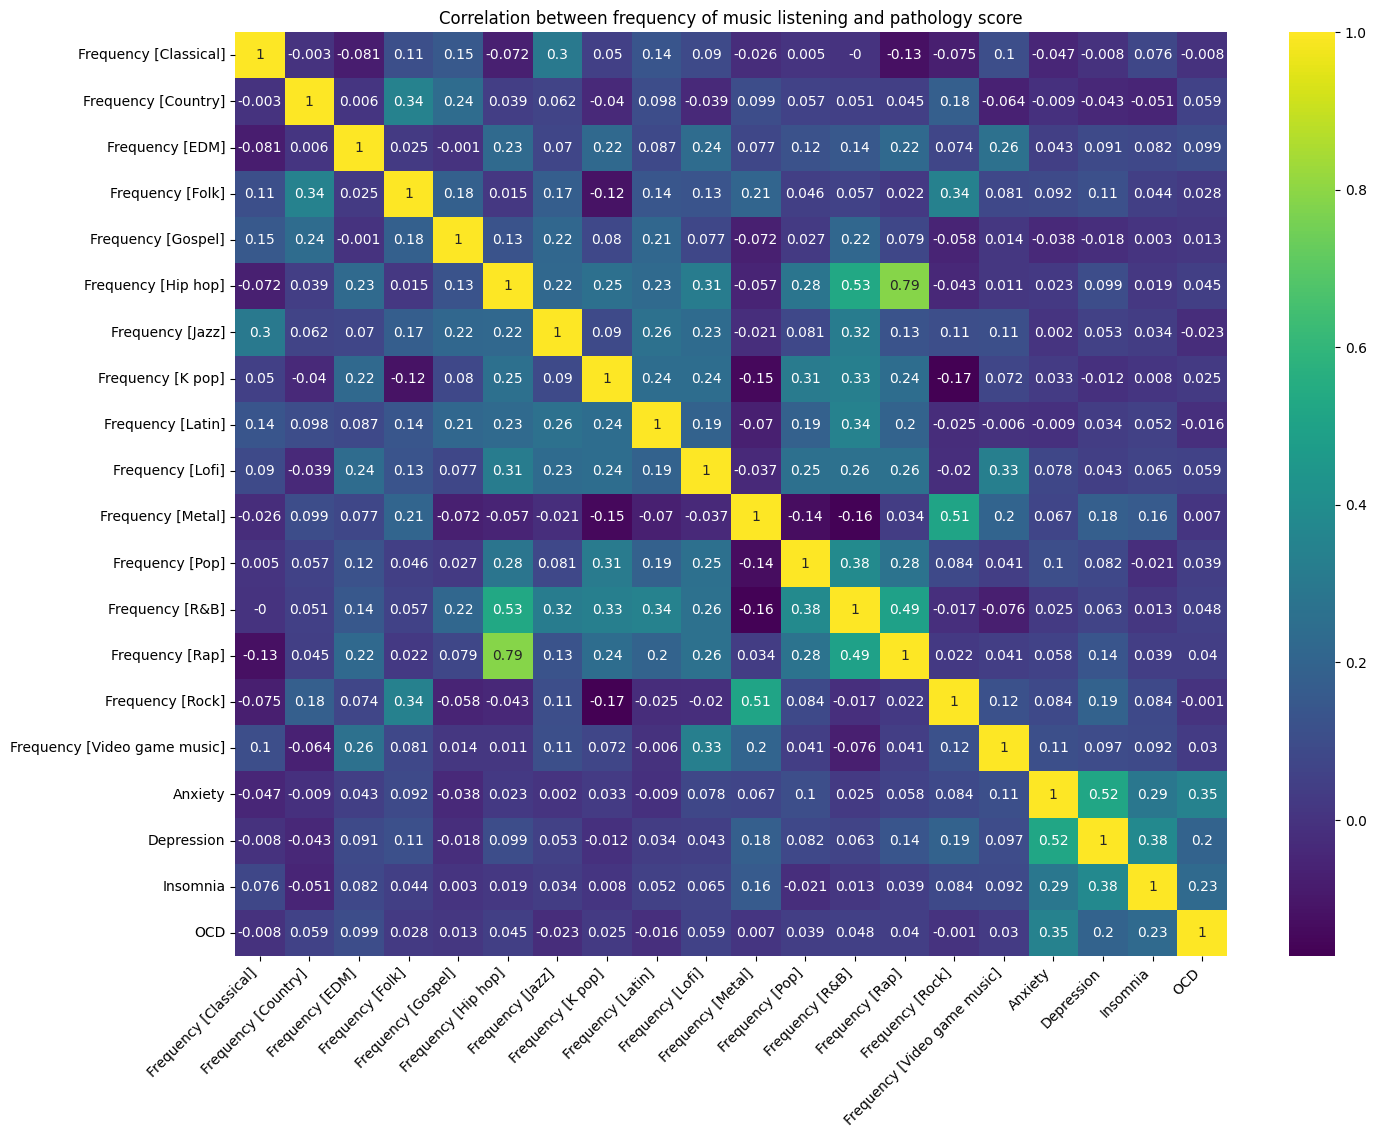

In [ ]:
#ya con la tabla de correlaciones, podemos hacer el heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_fmusic, annot=True, cmap='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation between frequency of music listening and pathology score')
plt.show()

A simple vista podemos ver que en contra de lo previsto, no tenemos grandes correlaciones en el gráfico.

-Sí que se puede observar, y tiene bastante sentido, que las puntuaciones de las distintas patologías están un tanto correlacionadas entre sí. No obstante, se trata de correlaciones muy discretas, exceptuando la correlación entre las puntuaciones de la ansiedad y la depresión (de un 0,52), que sobresale entre el resto, si bien no llega a ser una correlación muy elevada.

-No se observan correlaciones entre la frecuencia de escucha de ningún género musical y la puntuación de ninguna de las psicopatologías. De hecho, las correlaciones rara vez superan el 0,10, y nunca superan el 0,20.

-Sí que podemos encontrar algunas correlaciones elevadas entre la frecuencia de escucha de determinados estilos musicales. Tenemos el caso por ejemplo de la gran correlación que hay entre el rap y el hip hop (0,79), el R&B y el hip hop (0,53), o el rock y el metal (0,51). Es algo que nos parece totalmente lógico, ya que se trata de géneros afines.

##RELACIÓN ENTRE PATOLOGÍAS, FACTORES PERSONALES Y HÁBITOS MUSICALES

En este apartado nos centraremos en lo que consideramos que es el núcleo de este proyecto: investigar si existe algún vínculo entre las diferentes patologías presentes en los encuestados y, por un lado, ciertos factores personales, y por otro, sus hábitos musicales.

Así pues, el objetivo es identificar posibles patrones que nos ayuden a entender cómo estas condiciones de salud mental pueden estar relacionadas con sus comportamientos musicales y características personales.

Empezaremos esta sección con las relaciones que pueda haber entre las patologías y la edad. Para ello, vamos a establecer correlaciones entre las puntuaciones que han obtenido los encuestados en las diversas patologías, y su edad.

In [ ]:
df[['Anxiety', 'Age']].corr()

,Anxiety,Age
Anxiety,1.000000,-0.177031
Age,-0.177031,1.000000


In [ ]:
df[['Depression', 'Age']].corr()

,Depression,Age
Depression,1.000000,-0.121242
Age,-0.121242,1.000000


In [ ]:
df[['Insomnia', 'Age']].corr()

,Insomnia,Age
Insomnia,1.000000,0.007174
Age,0.007174,1.000000


In [ ]:
df[['OCD', 'Age']].corr()

,OCD,Age
OCD,1.000000,-0.130623
Age,-0.130623,1.000000


No se observan correlaciones significativas en ninguno de los casos. Sin embargo, sí podemos hacer un par de apuntes:

-Las correlaciones son negativas en tres de las cuatro patologías. Es decir, exceptuando el caso de Insomnia, el resto son correlaciones negativas. Eso apunta a una tendencia de "mayor cantidad de psicopatología", si se me permite la expresión, conforme disminuye la edad. Aún así, como ya he señalado antes, se trata de correlaciones que están muy lejos de resultar significativas, no permiten extraer conclusiones.

-La correlación más alta (la cual no llega a un -0,20) se da entre la puntuación de Ansiedad y la edad.

Vamos ahora con la relación entre las patologías y la cantidad de horas que se escucha música. Vamos a seguir el mismo proceso que en el apartado anterior, haremos una correlación en cada psicopatología.

In [ ]:
df[['Anxiety', 'Hours per day']].corr()

,Anxiety,Hours per day
Anxiety,1.000000,0.049319
Hours per day,0.049319,1.000000


In [ ]:
df[['Depression', 'Hours per day']].corr()

,Depression,Hours per day
Depression,1.000000,0.110527
Hours per day,0.110527,1.000000


In [ ]:
df[['Insomnia', 'Hours per day']].corr()

,Insomnia,Hours per day
Insomnia,1.000000,0.141821
Hours per day,0.141821,1.000000


In [ ]:
df[['OCD', 'Hours per day']].corr()

,OCD,Hours per day
OCD,1.000000,0.118729
Hours per day,0.118729,1.000000


En este caso las correlaciones siguen siendo más que discretas. Eso sí, observamos que al contrario que con la edad, todo son correlaciones positivas. La correlación más alta es la que hay entre insomnio y horas de escucha de música. Se aprecia una tendencia a la alza, de incrementarse el número de horas de escucha de música conforme aumenta el nivel de insomnio, lo cual nos parece algo con bastante sentido. No obstante, vuelvo a decir que sigue siendo una correlación muy discreta.

Vamos ahora con la relación que pueda haber entre las psicopatologías y el hecho de escuchar música en el trabajo. Agruparemos los registros en aquellos que no escuchan música en el trabajo, los que sí la escuchan y aquellos que no respondieron.

In [ ]:
#para cada uno de estos grupos, obtenemos la media de las distintas psicopatologías
pathology_music_working = df.groupby('While working')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index().round(1)
pathology_music_working

,While working,Anxiety,Depression,Insomnia,OCD
0,No,5.6,4.5,3.5,2.2
1,Not specified,7.7,5.0,7.3,4.0
2,Yes,5.9,4.9,3.8,2.8


In [ ]:
#hacemos lo mismo pero con la mediana
pathology_music_working2 = df.groupby('While working')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].median().reset_index().round(1)
pathology_music_working2

,While working,Anxiety,Depression,Insomnia,OCD
0,No,6.0,4.0,3.0,1.0
1,Not specified,9.0,5.0,10.0,5.0
2,Yes,6.0,5.0,3.0,2.0


Comparando el grupo que no escucha música en el trabajo con el que sí escucha música, no se aprecian grandes diferencias en cuanto a las puntuaciones de las patologías.

Lo que sí que llama la atención es el grupo de aquellos que no especificaron si escuchaban música en el trabajo: este colectivo presenta unas puntuaciones muy elevadas, especialmente en asnsiedad, insomnio, y también en TOC.

No obstante, tenemos que recordar que este colectivo está representado con una muestra de tamaño diminuto (ya vimos que tres encuestados), con lo que tampoco podemos extraer ninguna conclusión fiable.

Seguimos ahora con la relación que pueda haber entre las patologías y tocar algún instrumento.

In [ ]:
#como en el ejemplo anterior, agrupamos según si se toca un instrumento o no
pathology_instrumentalist = df.groupby('Instrumentalist')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index().round(1)
pathology_instrumentalist

,Instrumentalist,Anxiety,Depression,Insomnia,OCD
0,No,5.8,4.8,3.7,2.6
1,Not specified,5.5,4.8,4.8,2.5
2,Yes,5.9,4.8,3.9,2.7


In [ ]:
pathology_instrumentalist2 = df.groupby('Instrumentalist')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].median().reset_index().round(1)
pathology_instrumentalist2

,Instrumentalist,Anxiety,Depression,Insomnia,OCD
0,No,6.0,5.0,3.0,2.0
1,Not specified,5.5,6.0,4.0,2.0
2,Yes,7.0,5.0,3.0,2.0


En este caso no existen diferencias relevantes entre los diferentes grupos que hemos establecido.

Ahora es el turno de la posible relación entre las patologías y componer música.

In [ ]:
pathology_composer = df.groupby('Composer')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index().round(1)
pathology_composer

,Composer,Anxiety,Depression,Insomnia,OCD
0,No,5.8,4.7,3.6,2.6
1,Not specified,4.0,5.0,2.0,5.0
2,Yes,5.9,5.1,4.4,2.7


In [ ]:
pathology_composer2 = df.groupby('Composer')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].median().reset_index().round(1)
pathology_composer2

,Composer,Anxiety,Depression,Insomnia,OCD
0,No,6.0,5.0,3.0,2.0
1,Not specified,4.0,5.0,2.0,5.0
2,Yes,6.5,6.0,4.0,2.0


En este caso tampoco se observan diferencias estadísticamente significativas. Sí se puede observar que aquellos que componen música presentan puntuaciones de las psicopatologías un tanto más elevadas, pero son diferencias muy leves.

Vamos ahora con la relación entre la puntuación obtenida en las distintas patologías y el hecho de estar abiertos a explorar otros géneros musicales.

In [ ]:
pathology_exploratory = df.groupby('Exploratory')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index().round(1)
pathology_exploratory

,Exploratory,Anxiety,Depression,Insomnia,OCD
0,No,5.7,4.5,3.5,2.5
1,Yes,5.9,4.9,3.8,2.7


In [ ]:
pathology_exploratory2 = df.groupby('Exploratory')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].median().reset_index().round(1)
pathology_exploratory2

,Exploratory,Anxiety,Depression,Insomnia,OCD
0,No,6.0,5.0,3.0,1.0
1,Yes,6.0,5.0,3.0,2.0


Este caso sigue la tendencia vista en los anteriores y tampoco se aprecian diferencias. De hecho, si escogemos la mediana como estadístico, no encontraremos ninguna diferencia exceptuando en el TOC.

Es el turno de la relación entre las patologías y escuchar música extranjera.

In [ ]:
pathology_flanguages = df.groupby('Foreign languages')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index().round(1)
pathology_flanguages

,Foreign languages,Anxiety,Depression,Insomnia,OCD
0,No,5.6,4.5,3.6,2.7
1,Not specified,4.0,4.0,4.2,3.2
2,Yes,6.1,5.0,3.8,2.6


In [ ]:
pathology_flanguages2 = df.groupby('Foreign languages')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].median().reset_index().round(1)
pathology_flanguages2

,Foreign languages,Anxiety,Depression,Insomnia,OCD
0,No,6.0,4.0,3.0,2.0
1,Not specified,4.0,4.0,4.5,4.0
2,Yes,7.0,6.0,3.0,2.0


Una vez más, no se observan diferencias a tener en cuenta. Sí que se aprecia que las puntuaciones en ciertas psicopatologías (ansiedad y depresión) de aquellos que sí escuchan música extranjera, es algo superior.

Vemos ahora si hay relaciones entre la puntuación de las patologías y los BPM ( que serían las pulsaciones por minuto) del género favorito.

In [ ]:
df[['Anxiety', 'BPM']].corr()

,Anxiety,BPM
Anxiety,1.000000,0.056169
BPM,0.056169,1.000000


In [ ]:
df[['Depression', 'BPM']].corr()

,Depression,BPM
Depression,1.000000,0.049283
BPM,0.049283,1.000000


In [ ]:
df[['Insomnia', 'BPM']].corr()

,Insomnia,BPM
Insomnia,1.000000,0.060689
BPM,0.060689,1.000000


In [ ]:
df[['OCD', 'BPM']].corr()

,OCD,BPM
OCD,1.000000,-0.008098
BPM,-0.008098,1.000000


Ninguna de las correlaciones es elevada.

Concluimos esta sección explorando una posible relación entre las patologías y el hecho de pensar que la música tiene efectos sobre el estado de ánimo.

In [ ]:
pathology_effects = df.groupby('Music effects')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index().round(1)
pathology_effects

,Music effects,Anxiety,Depression,Insomnia,OCD
0,Improve,6.0,4.9,3.8,2.7
1,No effect,5.1,4.4,3.7,2.4
2,Not specified,4.8,4.1,2.4,1.9
3,Worsen,6.8,7.2,4.5,3.1


In [ ]:
pathology_effects2 = df.groupby('Music effects')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].median().reset_index().round(1)
pathology_effects2

,Music effects,Anxiety,Depression,Insomnia,OCD
0,Improve,7.0,5.0,3.0,2.0
1,No effect,5.0,4.0,3.0,1.0
2,Not specified,3.5,2.5,2.0,0.5
3,Worsen,7.0,8.0,4.0,2.0


En este caso sí que podemos hacer mención a unas destacadas diferencias entre las diferentes agrupaciones. Aquellos que piensan que la musica empeora su estado anímico puntúan por lo general más en todas las psicopatologías, especialmente en depresión, lo cual tiene bastante sentido porque damos por hecho que las personas que adolecen de depresión tienen un punto de vista más pesimista de la vida. Centrándonos en otros trastornos, como la ansiedad o el TOC, los que piensan que la música empeora su ánimo siguen teniendo una media superior a los que piensan que lo mejora, pero es verdad que estas diferencias desaparecen si escogemos como estadístico la mediana.

Es también interesante observar que, en promedio, las personas que creen que la música mejora su estado de ánimo tienden a puntuar más alto en las psicopatologías, en comparación con aquellos que consideran que la música no tiene ningún efecto.

##CONCLUSIONES DEL ANÁLISIS EXPLORATORIO

Este estudio ha buscado explorar las posibles relaciones entre características personales, preferencias y hábitos musicales y las condiciones de salud mental, empleando técnicas de análisis estadístico para desentrañar los datos. Sin embargo, uno de los principales desafíos a los que nos hemos enfrentado es el tamaño reducido de la muestra, lo que ha introducido limitaciones significativas en la capacidad de generalización de los resultados. En el estudio participaron 736 sujetos, lo cual nos parece una cantidad discreta. Eso, unido al hecho de que no están representados todos los géneros (contamos con ausencias como el trap o el reguetón, que al margen de los gustos personales, son estilos bastante extendidos internacionalmente), y que hay otros géneros que sí que aparecen pero con una representación extremadamente escasa (es el caso de la música latina, que es la favorita sólo de tres encuestados), hace que al menos algunas de las conclusiones obtenidas con los diferentes análisis se hayan visto sesgadas. Con lo cual, como he insistido en el trabajo, hay que tomarse estas conclusiones con precaución.

Además de los sesgos referidos en el anterior párrafo, podríamos encontrarnos con otros en las puntuaciones obtenidas en las distintas psicopatologías. Algunos podrían ser producidos por la dificultad intrínseca de medir rasgos o fenómenos psicológicos, dado que son aspectos invisibles e intangibles, lo que convierte a la evaluación psicológica en algo complejo. Por otra parte, recordemos que estas puntuaciones son autoinformadas, de manera que pueden estar sujetas también a otro sesgo, ya que a veces las personas no somos los más indicadas para valorar nuestra propia psique, siendo más conveniente y objetivo un agente externo.

Dicho esto, la ausencia de los resultados esperados puede estar relacionada tanto con los sesgos mencionados anteriormente como con la posibilidad de que las conexiones pronosticadas no existan en realidad. Un ejemplo de ello es la expectativa de encontrar una correlación entre el número de horas dedicadas a escuchar música y las puntuaciones en alguna de las psicopatologías. Otro ejemplo es el heatmap que trataba de enlazar la frecuencia de escucha de los diferentes estilos musicales con las puntuaciones de las psicopatologías. Sin embargo, nuestros análisis no han revelado ningunas relaciones significativas en estos aspectos.

No obstante, de los múltiples análisis que hemos realizado sí que pensamos que merecen ser destacados una serie de hallazgos:

-Las encuestas parecen haber sido hechas en población anglosajona, dada la predominancia de géneros como el rock o el pop, o que géneros como la música country y el gospel estén representados. Además, la muestra está compuesta en su mayoría por personas jóvenes; recordemos que sólo el 25% de los encuestados tiene más de 28 años.

-De media, dedicamos casi cuatro horas diarias a escuchar música, que es un dato que refleja la importancia de la música en nuestras vidas.

-Por otro lado, entre los participantes de la encuesta, la ansiedad se ha revelado como el problema de salud mental más prevalente, seguido por la depresión, el insomnio y el TOC, en ese orden. Este patrón de prevalencia coincide en gran medida con lo que se observa en estudios más amplios sobre salud mental, lo que sugiere que, a pesar de las limitaciones del estudio, los datos sobre psicopatologías son consistentes con investigaciones previas.

-Los datos también parecen apuntar a que aquellos encuestados que creen que la música empeora su estado de ánimo tienden a puntuar más alto en las diferentes psicopatologías, especialmente en depresión. Esto sugiere que las personas que tienden a la depresión suelen tener una visión más negativa de la realidad, en la cual la música se convierte en un elemento que agrava su malestar, en lugar de aliviarlo.

En resumen, aunque este estudio ha aportado algunos hallazgos interesantes sobre la relación entre la música y la salud mental, es fundamental interpretarlos con cautela debido a las limitaciones señaladas. No obstante, estos resultados abren la puerta a futuras investigaciones más amplias y representativas que puedan arrojar mayor claridad sobre las posibles conexiones entre los hábitos musicales y el bienestar psicológico.

#ANÁLISIS DE CLUSTERING

A continuación, iniciaremos la segunda parte de nuestro análisis, en la cual trataremos de agrupar los resultados del estudio mediante técnicas de clustering. Este proceso nos permitirá identificar patrones y subgrupos dentro de los datos, basados en características de los participantes en cuanto a salud mental y preferencias musicales. Utilizando este enfoque sin supervisión, buscamos descubrir posibles relaciones que no estaban definidas previamente, agrupando a las personas en clusters de acuerdo a su similitud en las variables estudiadas.

In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'Year', 'Hour'],
      dtype='object')

##CODIFICACIÓN

La mayoría de las variables en nuestro DataFrame no son numéricas, lo cual representa un inconveniente para realizar el clustering, ya que este requiere de datos numéricos.

Para abordar esta cuestión vamos a utilizar dos técnicas de codificación:

-Aplicaremos One Hot Encoding a las variables dicotómicas, también a la variable que indica si la música tiene efectos, y por último a la variable relacionada con el género musical favorito.

-Para el resto de las variables que queremos incluir en el análisis de clustering, reutilizaremos el DataFrame que ya contiene la frecuencia de escucha de géneros musicales y las puntuaciones de psicopatologías, las cuales ya están codificadas numéricamente. Pensamos que esta estrategia es más apropiada, ya que asignamos números que van incrementándose en función de la frecuencia.

In [ ]:
#seleccionamos las columnas que queremos codificar con el método one hot encoder, para luego llevar a cabo la codificación
columns_encode = ['While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'Music effects']
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(df[columns_encode])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_encode))
encoded_df

,While working_No,While working_Not specified,While working_Yes,Instrumentalist_No,Instrumentalist_Not specified,Instrumentalist_Yes,Composer_No,Composer_Not specified,Composer_Yes,Fav genre_Classical,...,Fav genre_Video game music,Exploratory_No,Exploratory_Yes,Foreign languages_No,Foreign languages_Not specified,Foreign languages_Yes,Music effects_Improve,Music effects_No effect,Music effects_Not specified,Music effects_Worsen
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
732,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
733,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
734,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#usamos el df que ya teníamos con la frecuencia de escucha de los diferentes géneros y las puntuaciones en las psicopatologías
df_fmusic

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,3.0,1.0,0.0,3.0,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0
1,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0
2,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0
3,2.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0
4,0.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,2.0,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,3.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,3.0,0.0,1.0,3.0,0.0,7.0,6.0,0.0,9.0
732,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,2.0,2.0,3.0,2.0,2.0,5.0
733,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0
734,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0


In [ ]:
#concatenamos estos dos dataframes para unirlo en uno solo, que es el que utilizaremos de base para el estudio de clustering
df_2 = pd.concat([encoded_df, df_fmusic], axis=1)
df_2

,While working_No,While working_Not specified,While working_Yes,Instrumentalist_No,Instrumentalist_Not specified,Instrumentalist_Yes,Composer_No,Composer_Not specified,Composer_Yes,Fav genre_Classical,...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,3.0,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,3.0,0.0,1.0,3.0,0.0,7.0,6.0,0.0,9.0
732,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,2.0,2.0,3.0,2.0,2.0,5.0
733,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0
734,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0


##ESTANDARIZACIÓN

Para asegurarnos de que todas las variables tengan una escala comparable y evitar que las de mayor rango influyan desproporcionadamente en el análisis de clustering, aplicaremos una estandarización a nuestros datos. En este caso, usaremos Robust Scaler, una técnica que reduce la influencia de los valores atípicos. Esto nos permitirá equilibrar el peso de nuestras distintas variables.

In [ ]:
scaler = RobustScaler()
df_2_scaled = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)
df_2_scaled

,While working_No,While working_Not specified,While working_Yes,Instrumentalist_No,Instrumentalist_Not specified,Instrumentalist_Yes,Composer_No,Composer_Not specified,Composer_Yes,Fav genre_Classical,...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,0.0,0.0,0.0,-1.0,0.0,1.0,-1.0,0.0,1.0,0.0,...,-0.5,0.5,0.5,1.0,-1.0,0.5,-0.75,-1.0,-0.4,-0.4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,0.0,0.5,0.0,0.5,0.0,0.25,-0.6,-0.2,-0.2
2,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,-0.5,-0.5,0.0,-0.5,1.0,0.25,0.4,1.4,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,...,-0.5,0.0,0.5,-0.5,-1.0,-0.5,0.75,0.4,0.0,0.2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,0.0,1.0,1.0,-1.0,0.0,0.25,-0.6,0.4,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,-0.5,0.0,0.5,-0.5,0.25,0.2,-0.6,1.4
732,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.5,0.5,-0.5,-0.5,0.0,0.5,-0.75,-0.6,-0.2,0.6
733,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,...,0.0,0.0,0.5,0.5,-0.5,0.0,-1.00,-0.6,-0.2,0.0
734,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.5,-1.0,-0.5,-0.5,-1.0,0.5,-1.00,-0.4,-0.2,-0.2


##REDUCCIÓN DE DIMENSIONALIDAD

Dado el alto número de variables que queremos incluir en nuestro análisis, aplicaremos una técnica de reducción de dimensionalidad para simplificar la representación de los datos sin perder información relevante. Para ello, hemos seleccionado la técnica PCA (Análisis de Componentes Principales), que transforma los datos en un conjunto de nuevas dimensiones creadas para este propósito. En este caso, reduciremos las dimensiones a tres, para posteriormente poder visualizar los datos en un gráfico tridimensional.

In [ ]:
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df_2_scaled)

In [ ]:
#creamos el dataframe en el cual nos basaremos para hacer el gráfico
df_pca = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])

In [ ]:
#vamos a crear el gráfico para mostrar los resultados; va a ser un scatter plot en tres dimensiones
fig = go.Figure(data=[go.Scatter3d(x=df_pca['PC1'], y=df_pca['PC2'], z=df_pca['PC3'], mode='markers', marker=dict(size=5))])
fig.update_layout(scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3')) #también establecemos los títulos de los ejes
fig.show()

In [ ]:
#como información adicional, también queremos hallar la varianza explicada en cada uno de los componentes
print('Varianza explicada por cada componente:',pca.explained_variance_)
print('Proporción de varianza explicada por cada componente:',pca.explained_variance_ratio_)

Varianza explicada por cada componente: [1.98583417 1.22611598 1.05965914]
Proporción de varianza explicada por cada componente: [0.15733338 0.09714254 0.08395452]


Sumando la proporción de los tres componentes, obtenemos aproximadamente un 0,33 de varianza explicada. Esto es, las nuevas dimensiones que hemos creado con la PCA recogen aproximadamente un tercio de la información en total de las 'antiguas' dimensiones. Aunque estos resultados son modestos, somos conscientes de las limitaciones de los datos, los cuales presentan ciertos sesgos y conforman una muestra relativamente pequeña.

##CLUSTERING CON DBSCAN

Una vez llevada a cabo la reducción de dimensionalidad, vamos a intentar establecer grupos mediante clusters. Escogemos como algoritmo de clustering DBSCAN porque a diferencia de otras técnicas como K-means, DBSCAN no requiere especificar el número de clusters y además es bueno detectándolos de forma arbitraria.

In [ ]:
#aplicamos DBSCAN
dbscan = DBSCAN()
clusters = dbscan.fit_predict(reduced_data)

In [ ]:
#convertimos a string para que Plotly lo trate como categoría, en lugar de un dato numérico continuo (lo cual provocaba que aplicaba en el gráfico una escala continua de colores)
df_pca['Cluster'] = clusters.astype(str)
#creamos el gráfico en sí
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Cluster', title='Clusters', labels={'cluster': 'Clusters'})
fig.update_traces(marker=dict(size=4))
fig.update_layout(scene=dict(xaxis_title="PC1", yaxis_title="PC2", zaxis_title="PC3"), title_x=0.5)
fig.show()

A continuación, las conclusiones halladas tras obtener el gráfico:

-El modelo ha establecido diez agrupaciones: nueve clusters propiamente dichos y otro grupo que conformaría el ruido.

-El tamaño de los clusters es bastante variable, pudiéndonos encontrar clusters integrados por muchos puntos, y también con otros formados por pocos.

-Los datos no presentan una estructura de clusters bien definida, sino que tienen una distribución que podríamos llamar amorfa: tenemos un cluster principal, el 0 (color rojo) que ocupa aproximadamente la zona central y que aglutina la mayoría de los datos. Este cluster está rodeado de otros clusters significativamente más pequeños. También se observa ruido, que se ubica en zonas periféricas.

Pensamos que sería interesante cambiar alguno de los parámetros del algoritmo DBSCAN para comprobar si hallamos otros resultados más acordes a lo esperado. Alteramos el parámetro 'eps', que establece la distancia máxima que debe haber entre dos puntos para ser considerados pertenecientes al mismo cluster.

In [ ]:
#como lo que queremos es disminuir el número de clusters, aumentamos el valor de eps, que por defecto se establece en 0.5
dbscan2 = DBSCAN(eps=0.7)
clusters2 = dbscan2.fit_predict(reduced_data)

In [ ]:
df_pca['Cluster'] = clusters2.astype(str)
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Cluster', title='Clusters', labels={'cluster': 'Clusters2'})
fig.update_traces(marker=dict(size=4))
fig.update_layout(scene=dict(xaxis_title="PC1", yaxis_title="PC2", zaxis_title="PC3"), title_x=0.5)
fig.show()

Hemos acortado el número de clusters pero en esencia seguimos contando con lo mismo: un cluster principal, varios pequeños clusters adicionales (en este caso, solo dos) y una cantidad de ruido, aunque ahora en menor proporción.

A pesar de haber reducido el número de clusters mediante ajustes en el parámetro eps, no hemos logrado los agrupamientos esperados, y el modelo sigue mostrando una estructura aparentemente amorfa. Estos resultados reflejan la dificultad de obtener agrupaciones claras y distinguibles en estos datos, tal vez producidas por los sesgos a los que hemos hecho referencia con anterioridad. Con ello, concluimos que las limitaciones de este conjunto de datos dificultan una segmentación precisa, lo que reduce las posibilidades de lograr una interpretación más detallada de los grupos.